## Problem 1: Geocode shopping centers (5 points)

In the first problem the aim is to find out the addresses of shopping centers and to retreive numercal coordinates for these addresses. As an output, we will have a Shapefile called `shopping_centers.shp` which contains the geocoded result.

**Preparation:** Find out the addresses for following shopping centers from the internet, and write the addresses into a text file called `shopping_centers.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI

`shopping_centers.txt` should have semicolon (`;`) as a separator, and the file should include the following columns:

- ``id`` (integer) containing a unique identifier for each shopping center
- ``name`` (string) of each shopping center
- ``addr`` (string) the address 


See an example of how to format the text file [in the lesson materials](https://automating-gis-processes.github.io/2018/master/notebooks/L3/geocoding_in_geopandas.html). Save (and upload) the file into your exercise repository, and read it into a pandas DataFrame called ``data``:

In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
# Read the data (replace "None" with your own code)
data = pd.read_csv("shopping_centers.txt",sep=";")

In [2]:
# Check your input data
print(data)

   id       name                                   addr
0   1       Itis            Itäkatu 1-7, 00930 Helsinki
1   2      Forum  Mannerheimintie 14–20, 00100 Helsinki
2   3  Iso-omena           Piispansilta 11, 02230 Espoo
3   4      Sello       Leppävaarankatu 3-9, 02600 Espoo
4   5      Jumbo                           01510 Vantaa
5   6       REDI   Hermannin rantatie 5, 00580 Helsinki


- Geocode the addresses in Geopandas using the Nominatim geocoder in a similar manner as was done in the [lesson materials](https://automating-gis-processes.github.io/2018/master/notebooks/L3/geocoding_in_geopandas.html)



In [3]:
from geopandas.tools import geocode

# Geocode addresses with Nominatim backend
geo = geocode(data['addr'], provider = 'nominatim', user_agent = 'autogis_student_xx')
geo.head()

,geometry,address
0,POINT (25.0829394427168 60.21170635),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va..."
1,POINT (24.936116 60.171405),"Mannerheimintie, Keskusta, Kluuvi, Eteläinen s..."
2,POINT (24.73833665221 60.1612882),"Iso Omena, 11, Piispansilta, Espoo, Helsingin ..."
3,POINT (24.8099222238214 60.21867775),"3-9, Leppävaarankatu, Etelä-Leppävaara, Leppäv..."
4,POINT (25.0364526 60.3091871),"Vantaa, Helsingin seutukunta, Uusimaa, Etelä-S..."


In [4]:
# Check the geocoded output
print(geo)

                               geometry  \
0  POINT (25.0829394427168 60.21170635)   
1           POINT (24.936116 60.171405)   
2     POINT (24.73833665221 60.1612882)   
3  POINT (24.8099222238214 60.21867775)   
4         POINT (25.0364526 60.3091871)   
5         POINT (24.9790421 60.1870232)   

                                             address  
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...  
1  Mannerheimintie, Keskusta, Kluuvi, Eteläinen s...  
2  Iso Omena, 11, Piispansilta, Espoo, Helsingin ...  
3  3-9, Leppävaarankatu, Etelä-Leppävaara, Leppäv...  
4  Vantaa, Helsingin seutukunta, Uusimaa, Etelä-S...  
5  Silta, 5, Hermannin rantatie, Kalasatama, Sörn...  


Reproject the geometries into a EPSG projection 3879

In [5]:
# Import pyproj
import pyproj
import fiona
from fiona.crs import from_epsg
# Reproject the geometries into a EPSG projection 3879
geo = geo.to_crs(from_epsg(3879))
#geo = geo.to_crs(epsg=3879)

In [6]:
geo.crs

{'init': 'epsg:3879', 'no_defs': True}

In [7]:
# Check layer crs
print(geo.crs)

{'init': 'epsg:3879', 'no_defs': True}


- Make a Table join between the geocoded addresses (``geo``) and the original addresses (``data``) in order to link the numerical coordinates and  the `id` and `name` of each shopping center. 
- Store the output in a variable called ``geodata`` 


In [8]:
# Join the tables
geodata = geo.join(data)

In [9]:
type(geodata)

geopandas.geodataframe.GeoDataFrame

In [10]:
# Check the join output
geodata.head()

,geometry,address,id,name,addr
0,POINT (25504598.41930912 6677662.776904543),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis,"Itäkatu 1-7, 00930 Helsinki"
1,POINT (25496453.7290285 6673171.406976718),"Mannerheimintie, Keskusta, Kluuvi, Eteläinen s...",2,Forum,"Mannerheimintie 14–20, 00100 Helsinki"
2,POINT (25485470.33883667 6672071.306847659),"Iso Omena, 11, Piispansilta, Espoo, Helsingin ...",3,Iso-omena,"Piispansilta 11, 02230 Espoo"
3,POINT (25489463.74430429 6678451.782203159),"3-9, Leppävaarankatu, Etelä-Leppävaara, Leppäv...",4,Sello,"Leppävaarankatu 3-9, 02600 Espoo"
4,POINT (25502015.0453754 6688521.428954332),"Vantaa, Helsingin seutukunta, Uusimaa, Etelä-S...",5,Jumbo,01510 Vantaa


- Save the output as a Shapefile called `shopping_centers.shp`

In [13]:
# Define output filepath
out_fp = r'shopping_centers.shp'
# Save file
geodata.to_file(out_fp)
#gpd.GeoDataFrame(geodata).T.apply(pd.to_numeric, errors='ignore').to_file(out_fp)

In [14]:
# Print info about output file
print("Geocoded output is stored in:", out_fp)

Geocoded output is stored in: shopping_centers.shp


## Problem 2: Create buffers around shopping centers (5 points)

Let's continue with our case study and calculate a 5 km `buffer` around the geocoded points. 


- Create a new column called `buffer` to your shopping-centers GeoDataFrame (the variable name should be ``geodata``).

In [62]:
# cerate a new column
geodata["buffer"] = None

- Calculate a 5 km buffer for each geocoded point:
    - Iterate over the rows in your GeoDataFrame and update the `buffer` column with a 5 km buffer Polygon.
    - Use Shapely's [buffer](http://toblerity.org/shapely/manual.html#object.buffer) function (see the link for details how to use it)
    - You only need to use the `distance` -parameter, don't care about the other parameters.

In [64]:
# add the point buffer
from shapely.geometry import CAP_STYLE, JOIN_STYLE

# run the loop
#for ind, row in temp2.iterrows():
    #temp2.loc[ind,"buffer"] = temp2.loc[ind,"geometry"].buffer(5000)
geodata["buffer"] = geodata.apply(lambda row: geodata["geometry"].buffer(5000), axis=0)  

In [65]:
print(geodata.head())

                                      geometry  \
0  POINT (25504598.41930912 6677662.776904543)   
1   POINT (25496453.7290285 6673171.406976718)   
2  POINT (25485470.33883667 6672071.306847659)   
3  POINT (25489463.74430429 6678451.782203159)   
4   POINT (25502015.0453754 6688521.428954332)   

                                             address  id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   1       Itis   
1  Mannerheimintie, Keskusta, Kluuvi, Eteläinen s...   2      Forum   
2  Iso Omena, 11, Piispansilta, Espoo, Helsingin ...   3  Iso-omena   
3  3-9, Leppävaarankatu, Etelä-Leppävaara, Leppäv...   4      Sello   
4  Vantaa, Helsingin seutukunta, Uusimaa, Etelä-S...   5      Jumbo   

                                    addr  \
0            Itäkatu 1-7, 00930 Helsinki   
1  Mannerheimintie 14–20, 00100 Helsinki   
2           Piispansilta 11, 02230 Espoo   
3       Leppävaarankatu 3-9, 02600 Espoo   
4                           01510 Vantaa   

       

In [67]:
temp = geodata.copy()

- Replace the values in `geometry` column with the values of `buffer` column

In [69]:
# Replace the values in geometry column with the values of buffer column
#pop = pop.rename(columns={'ASUKKAITA': 'pop17'})
geodata["geometry"] = geodata["buffer"]

In [70]:
print(geodata.head())

                                            geometry  \
0  POLYGON ((25509598.41930912 6677662.776904543,...   
1  POLYGON ((25501453.7290285 6673171.406976718, ...   
2  POLYGON ((25490470.33883667 6672071.306847659,...   
3  POLYGON ((25494463.74430429 6678451.782203159,...   
4  POLYGON ((25507015.0453754 6688521.428954332, ...   

                                             address  id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   1       Itis   
1  Mannerheimintie, Keskusta, Kluuvi, Eteläinen s...   2      Forum   
2  Iso Omena, 11, Piispansilta, Espoo, Helsingin ...   3  Iso-omena   
3  3-9, Leppävaarankatu, Etelä-Leppävaara, Leppäv...   4      Sello   
4  Vantaa, Helsingin seutukunta, Uusimaa, Etelä-S...   5      Jumbo   

                                    addr  \
0            Itäkatu 1-7, 00930 Helsinki   
1  Mannerheimintie 14–20, 00100 Helsinki   
2           Piispansilta 11, 02230 Espoo   
3       Leppävaarankatu 3-9, 02600 Espoo   
4               

## Problem 3: How many people live within 5 km from shopping centers? (5 points)

Last step in our analysis is to make a spatial join between our point-buffer layer and population data in order to find out how many people live near each shopping center. We will use the same data as we did during lesson 3; **a Population Grid from 2017** that is available from the [Helsinki Region Infoshare (HRI)](https://www.hsy.fi/fi/asiantuntijalle/avoindata/Sivut/AvoinData.aspx?dataID=7). 

Before solving this problem you need have downloaded the population grid. See instructions for downloading the data using **wget** from the [lesson 3 materials](https://automating-gis-processes.github.io/2018/master/notebooks/L3/spatial-join.html#Download-and-clean-the-data). 

**Steps**

- Read the data into a geodataframe

- Select only the useful columns: ``'ASUKKAITA'`` (=population count per grid square) and ``'geometry'`` from the population grid

- Make a spatial join between your buffered point layer and population grid layer

  - Note: Join the information now from buffer layer **into the population grid layer**

- Group the joined layer by shopping center index

- Calculate the sum of population living within 5 km for each shopping center.

- Print out the population living within 5km from each shopping center:

     - Itis
     - Forum
     - Iso-omena
     - Sello
     - Jumbo
     - REDI

*Feel free to divide your solution into several codeblocks! Remember to comment your code  :)*

In [72]:
# read the data
fp = "Pop17/Vaestoruudukko_2017.shp"

# Read the data
pop = gpd.read_file(fp)

# See the first rows
pop.head()

,INDEX,ASUKKAITA,ASVALJYYS,IKA0_9,IKA10_19,IKA20_29,IKA30_39,IKA40_49,IKA50_59,IKA60_69,IKA70_79,IKA_YLI80,geometry
0,688,9,28.0,99,99,99,99,99,99,99,99,99,POLYGON Z ((25472499.99532626 6689749.00506918...
1,710,8,44.0,99,99,99,99,99,99,99,99,99,POLYGON Z ((25472499.99532626 6684249.00413040...
2,711,5,90.0,99,99,99,99,99,99,99,99,99,POLYGON Z ((25472499.99532626 6683999.00499700...
3,715,12,37.0,99,99,99,99,99,99,99,99,99,POLYGON Z ((25472499.99532626 6682998.99846143...
4,848,6,44.0,99,99,99,99,99,99,99,99,99,POLYGON Z ((25472749.99291839 6690249.00333598...


In [73]:
# select two useful columns fro the data

# Columns that will be sected
selected_cols = ['ASUKKAITA', 'geometry']

# Select those columns
pop = pop[selected_cols]

# Let's see the last 2 rows
pop.head()

,ASUKKAITA,geometry
0,9,POLYGON Z ((25472499.99532626 6689749.00506918...
1,8,POLYGON Z ((25472499.99532626 6684249.00413040...
2,5,POLYGON Z ((25472499.99532626 6683999.00499700...
3,12,POLYGON Z ((25472499.99532626 6682998.99846143...
4,6,POLYGON Z ((25472749.99291839 6690249.00333598...


In [74]:
# Are the layers in the same projection?
geodata.crs == pop.crs

False

In [77]:
# re-project addresses to the projection of the population layer
geodata = geodata.to_crs(pop.crs)

In [78]:
# Are the layers in the same projection?
geodata.crs == pop.crs

True

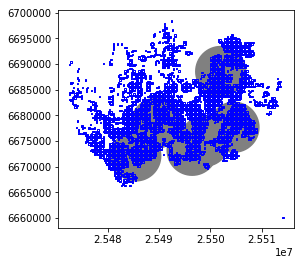

In [81]:
# just check the data have a overlap
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline
ax = geodata.plot(facecolor='gray')
pop.plot(ax=ax, facecolor='None', edgecolor='blue')

In [84]:
#Make a spatial join between your buffered point layer and population grid layer
join = gpd.sjoin(pop, geodata, how="inner", op="within")
join.head()

,ASUKKAITA,geometry,index_right,address,id,name,addr,buffer
493,134,POLYGON Z ((25480499.99408239 6672249.00571924...,2,"Iso Omena, 11, Piispansilta, Espoo, Helsingin ...",3,Iso-omena,"Piispansilta 11, 02230 Espoo","POLYGON ((25490470.33883667 6672071.306847659,..."
494,105,POLYGON Z ((25480499.99408239 6671998.99658387...,2,"Iso Omena, 11, Piispansilta, Espoo, Helsingin ...",3,Iso-omena,"Piispansilta 11, 02230 Espoo","POLYGON ((25490470.33883667 6672071.306847659,..."
495,24,POLYGON Z ((25480499.99408239 6671748.99745047...,2,"Iso Omena, 11, Piispansilta, Espoo, Helsingin ...",3,Iso-omena,"Piispansilta 11, 02230 Espoo","POLYGON ((25490470.33883667 6672071.306847659,..."
532,247,POLYGON Z ((25480750.00009762 6673249.00225285...,2,"Iso Omena, 11, Piispansilta, Espoo, Helsingin ...",3,Iso-omena,"Piispansilta 11, 02230 Espoo","POLYGON ((25490470.33883667 6672071.306847659,..."
533,64,POLYGON Z ((25480750.00009762 6672999.00311944...,2,"Iso Omena, 11, Piispansilta, Espoo, Helsingin ...",3,Iso-omena,"Piispansilta 11, 02230 Espoo","POLYGON ((25490470.33883667 6672071.306847659,..."


In [100]:
# Group the joined layer by shopping center index
grouped = join.groupby("id")

# create a new geodatafram
shopping_pop = gpd.GeoDataFrame()
#Calculate the sum of population living within 5 km for each shopping center.
for key, gro in grouped:
    pop_sum = gro[["ASUKKAITA"]].sum()  # double[] makes the pop_sum a dataframe
    pop_sum["id_n"] = key
    # Append the aggregated values into the DataFrame
    shopping_pop = shopping_pop.append(pop_sum, ignore_index=True)

In [103]:
shopping_pop

,ASUKKAITA,id_n
0,175632.0,1.0
1,230376.0,2.0
2,109081.0,3.0
3,174200.0,4.0
4,106918.0,5.0
5,249187.0,6.0


In [105]:
# Join the tables
shopping_pop_joint = shopping_pop.join(data)
shopping_pop_joint.head()

,ASUKKAITA,id_n,id,name,addr
0,175632.0,1.0,1,Itis,"Itäkatu 1-7, 00930 Helsinki"
1,230376.0,2.0,2,Forum,"Mannerheimintie 14–20, 00100 Helsinki"
2,109081.0,3.0,3,Iso-omena,"Piispansilta 11, 02230 Espoo"
3,174200.0,4.0,4,Sello,"Leppävaarankatu 3-9, 02600 Espoo"
4,106918.0,5.0,5,Jumbo,01510 Vantaa


In [127]:
#Print out the population living within 5km from each shopping center:
for ind, row in shopping_pop_joint.iterrows():
    print("The population living within 5km from {0} is {1}. ".format(row["name"], int(row["ASUKKAITA"])))

The population living within 5km from Itis is 175632. 
The population living within 5km from Forum is 230376. 
The population living within 5km from Iso-omena is 109081. 
The population living within 5km from Sello is 174200. 
The population living within 5km from Jumbo is 106918. 
The population living within 5km from REDI is 249187. 


** How challenging did you find problems 1-3 (on scale to 1-5), and why?**

I would give 3. a little difficult. I googled a lot as I want to know how to use apply function and I also a little bit forgot the previous content like "groupby"

Well done! Now you can continue to [problem 4](Exercise-3-Problem-4.ipynb)